In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,constraints

import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from matplotlib import pyplot as plt
import cv2
from libs import archanjo as arch

In [18]:
print(tf.__version__)

2.6.2


In [19]:
categorias = [0,1]
categorias_string = ["Hipertensos_Repouso_65_75_Supino","Saudaveis_Repouso_20_30_Supino"]

path_base = "/home/rafael/Documentos/FACOM/Mestrado/Materias/Defesa/Pesquisa/DSP/DataSet_VFC/New_Set/data/"

data_frame_cat = []
data_frame_numpy= []
ponse= arch.origpons(256)
for x in categorias:
    for class_data_dict in arch.coleta_dados(path_base + categorias_string[x]):
        name_user = class_data_dict[0]
        data = class_data_dict[1]
        sem_outliers = arch.removeoutlier(data.copy(), debug=False)
        estacionario = arch.select_estavel(sem_outliers)
        for estac_ in estacionario:
            data_=[]
            data_frame_cat.append(x)
            data_time=arch.timedomain(estac_[1])
            result,_,_ = arch.frequency_domain(rri=estac_[1])
            for dat_ in data_time:
                data_.append(np.round(data_time[dat_],2))
            for dat_ in result:
                data_.append(np.round(result[dat_],2))
            data_frame_numpy.append(np.array(data_))

In [20]:
data_frame_cat = np.array(data_frame_cat,dtype=np.int)
data_frame_numpy= np.array(data_frame_numpy,dtype=np.int)


In [21]:

rus = RandomUnderSampler(random_state=120)
train_images_balance_s_temp,train_labels_balance_s_temp = rus.fit_resample(data_frame_numpy,data_frame_cat)
train_images_balance_s=[]
train_labels_balance_s =train_labels_balance_s_temp

for data in tr
train_images_balance_s=np.array(train_images_balance_s)

In [22]:
dimensao=(-1,16,16,1)
train_images_balance_s=train_images_balance_s.reshape(dimensao)
train_images_balance_s=train_images_balance_s/150
print(data_frame_numpy.shape)
print(data_frame_cat.shape)
print(train_images_balance_s.shape)
print(train_labels_balance_s.shape)


(162, 16)
(162,)
(58, 16, 16, 1)
(58,)


In [23]:

train_images_balance, teste_images_predic, train_labels_balance, test_labels_predic = train_test_split(train_images_balance_s, train_labels_balance_s, shuffle=True, random_state=10, train_size=0.8)

print(train_images_balance.shape)

print(teste_images_predic.shape)

(46, 16, 16, 1)
(12, 16, 16, 1)


In [24]:

train_images, test_images, train_labels, test_labels = train_test_split(train_images_balance,train_labels_balance , shuffle=True, random_state=120, train_size=0.8)



print(train_images.shape)

print(test_images.shape)

(36, 16, 16, 1)
(10, 16, 16, 1)


[0 1 1 0 0 0 1 0 0 1]


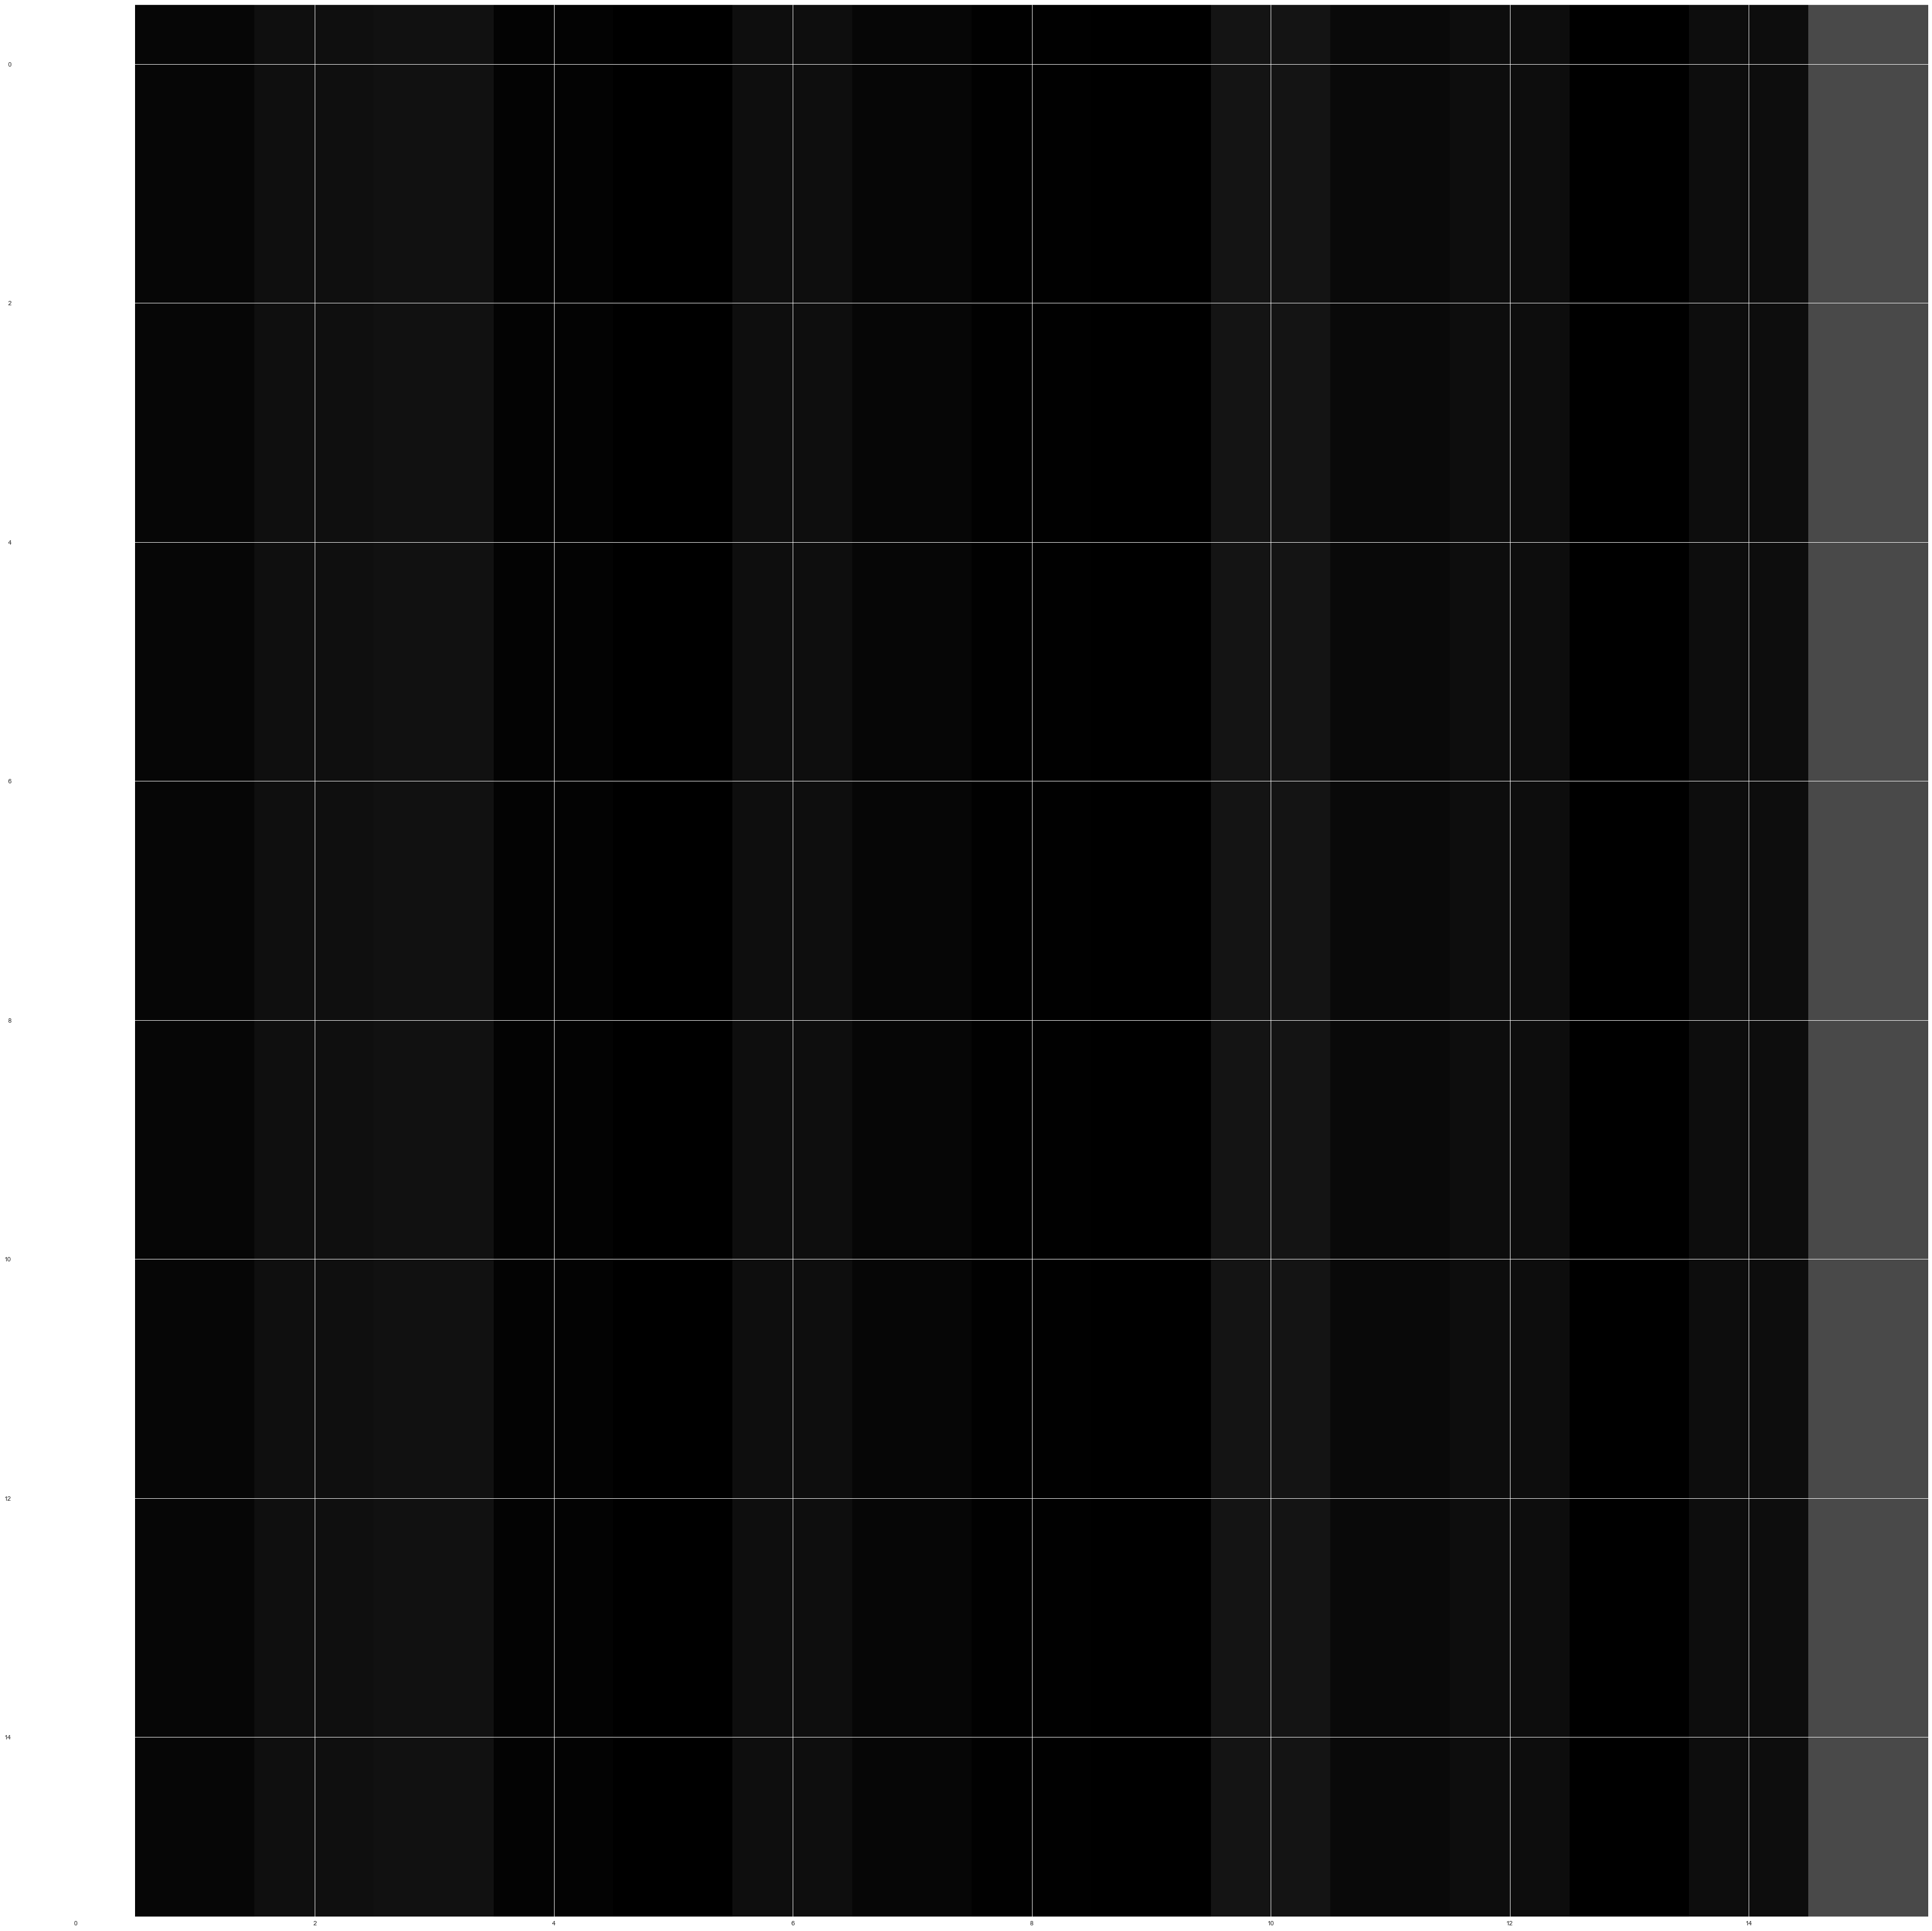

In [25]:
print(test_labels)
fig ,ax= plt.subplots(1, figsize=(56, 56))
plt.imshow(test_images[3],cmap="gray")
# ax[1].imshow(test_images[1],cmap="gray")


In [26]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(16, 16, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(8, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
#
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

Here's the complete architecture of your model:

In [27]:
# model.summary()

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True),  metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=1000,
                    validation_data=(test_images, test_labels))



Epoch 1/1000


/opt/anaconda/envs/RR/lib/python3.6/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


2/2 [==============================] - 1s 198ms/step - loss: 0.7031 - accuracy: 0.3333 - val_loss: 0.7059 - val_accuracy: 0.3000
Epoch 2/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.6938 - accuracy: 0.5278 - val_loss: 0.7038 - val_accuracy: 0.3000
Epoch 3/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.6899 - accuracy: 0.5556 - val_loss: 0.7005 - val_accuracy: 0.4000
Epoch 4/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.6861 - accuracy: 0.5556 - val_loss: 0.6967 - val_accuracy: 0.4000
Epoch 5/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.6844 - accuracy: 0.5556 - val_loss: 0.6934 - val_accuracy: 0.4000
Epoch 6/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.6878 - accuracy: 0.5556 - val_loss: 0.6919 - val_accuracy: 0.4000
Epoch 7/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.6861 - accuracy: 0.5556 - val_loss: 0.6908 - val_accuracy: 0.4000
Epoch 8/1000
2/2 [=======

In [29]:
y_pred=model.predict(teste_images_predic)
y_pred_max = np.argmax(y_pred, axis=1)
# print(y_pred)

print(y_pred_max)
print(test_labels_predic)
print(classification_report(test_labels_predic, y_pred_max))


[1 0 0 0 0 0 1 1 0 1 1 1]
[1 0 1 0 0 0 1 0 0 0 1 1]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.67      0.80      0.73         5

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



### Evaluate the model

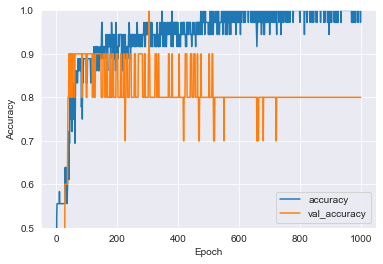

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

1/1 - 0s - loss: 0.8362 - accuracy: 0.8000
0.800000011920929


In [32]:
test_loss, test_acc = model.evaluate(teste_images_predic,  test_labels_predic, verbose=2)
print(test_acc)


1/1 - 0s - loss: 2.9867 - accuracy: 0.7500
0.75
